# Analyzing Credit Card Customer Usage Behavior Patterns with Clustering

https://github.com/ytongcs/Final-Project.git

## Abstract
A credit card company has, over time, supported data about the various customers it possesses. The company collected 9000 credit card usage data about various facts related to the customers, such as their balances, purchases, cash advances, credit line, etc. I intend to make meaningful insights from the data, including identifing customer with high risk, clustering customer with similar credit card usage behavior and assess what can be the recommendations and then devise strategies using which the company can target customers and increase credit card sales and revenue. 

## Background
One of the greatest challenges in credit card area, whatever it's fraud issue, sign-up approve or pay the bill on time, is that you often ﬁnd yourself one step behind. Your model is trained on past data. If users come up with a totally new way to commit a fraud, it often takes you some time to be able to react. A way to overcome this is to use unsupervised machine learning, instead of supervised. **With this approach, I don't need to have examples of certain patterns in order to make a prediction. Often, this works by looking at the data and identify clusters of activities or useage behavior.** 
- Question 1: Identify users that total purchase went above the monthly credit card limit. And profile their purchase.
- Question 2: Using appropriate unsupervised methodology to do customer segmentation and visualizing it in 2D or 3D plot.
- Question 3: Profile customer's usage patterns in different cluster and suggest marketing strategy.

## Method
Firstly I would clean and check the dataset, including taking care of the missing value based on it's distribution.

- To answer the first questions, I would **merge** two datasets, develope feature engineering to identify customers with high credit risk, and profile it's puarchase composition by histogram. 
- As for customer clustering, I intend to implement the **K-Means** to develop a customer segmentation and visualizing it with **PCA method**. 
- Then I would select several important metrics which contribute most to the principal components to describe the usage patterns for each group. And define marketing strategy in next step.

All analysis would be done with numpy, pandas, seaborn, matplotlib.pyplot,StandardScaler, KMeans and PCA from sklearn library.

## Result

### Dataset Brief Review

These Datasets summarize the usage behavior of about 9000 active credit card holders.

**cc_info** - general information about the credit card and its holder
- **CUST_ID** : Identification of Credit Card holder (Categorical) 
- **BALANCE** : Balance amount left in their account to make purchases 
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

- **CASH_ADVANCE** : Cash in advance given by the user 
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid 
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced" 

- **CREDIT_LIMIT** : Limit of Credit Card for user 
- **PAYMENTS** : Amount of Payment done by user 
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user 
- **PRCFULLPAYMENT** : Percent of full payment paid by user 
- **TENURE** : Tenure of credit card service for user

**transactions** - information about purchases that happens for the credit cards in cc_info.
- **CUST_ID** : Identification of Credit Card holder (Categorical) 
- **PURCHASES** : Amount of purchases made from account 
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go 
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **PURCHASES_TRX** : Numbe of purchase transactions made 
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Input dataset 1

In [2]:
#input dataset 1
info= pd.read_csv("./data/CC GENERAL.csv")
print(info.shape)
info.head()

(8950, 11)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,0.000000,0.000000,0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,6442.945483,0.250000,4,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,0.000000,0.000000,0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,205.788017,0.083333,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,0.000000,0.000000,0,1200.0,678.334763,244.791237,0.000000,12


Input dataset 2

In [3]:
#input dataset 2
transaction = pd.read_csv('./data/transactions.csv')
print(transaction.shape)
transaction.head()

(8950, 8)


,CUST_ID,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX
0,C10001,95.40,0.00,95.4,0.166667,0.000000,0.083333,2
1,C10002,0.00,0.00,0.0,0.000000,0.000000,0.000000,0
2,C10003,773.17,773.17,0.0,1.000000,1.000000,0.000000,12
3,C10004,1499.00,1499.00,0.0,0.083333,0.083333,0.000000,1
4,C10005,16.00,16.00,0.0,0.083333,0.083333,0.000000,1


In [4]:
#To answer the first question, I need to combine the informaton of credit line and purchase by merging 2 datasets.
data = pd.merge(left=transaction, right=info, on='CUST_ID', how='left')
data.head()

,CUST_ID,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,95.40,0.00,95.4,0.166667,0.000000,0.083333,2,40.900749,0.818182,0.000000,0.000000,0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,0.00,0.00,0.0,0.000000,0.000000,0.000000,0,3202.467416,0.909091,6442.945483,0.250000,4,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,773.17,773.17,0.0,1.000000,1.000000,0.000000,12,2495.148862,1.000000,0.000000,0.000000,0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1499.00,1499.00,0.0,0.083333,0.083333,0.000000,1,1666.670542,0.636364,205.788017,0.083333,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,16.00,16.00,0.0,0.083333,0.083333,0.000000,1,817.714335,1.000000,0.000000,0.000000,0,1200.0,678.334763,244.791237,0.000000,12


### Data Processing

#### 1. data merge

In [5]:
data.describe()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1003.204834,592.437371,411.067645,0.490351,0.202458,0.364437,14.709832,1564.474828,0.877271,978.871112,0.135144,3.248827,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2136.634782,1659.887917,904.338115,0.401371,0.298336,0.397448,24.857649,2081.531879,0.236904,2097.163877,0.200121,6.824647,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,39.635000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,128.281915,0.888889,0.000000,0.000000,0.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,361.280000,38.000000,89.000000,0.500000,0.083333,0.166667,7.000000,873.385231,1.000000,0.000000,0.000000,0.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,1110.130000,577.405000,468.637500,0.916667,0.300000,0.750000,17.000000,2054.140036,1.000000,1113.821139,0.222222,4.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,49039.570000,40761.250000,22500.000000,1.000000,1.000000,1.000000,358.000000,19043.138560,1.000000,47137.211760,1.500000,123.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### 2. Dealing with Missing Values

In [6]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
TENURE                0
PURCHASES_TRX         0
PURCHASES             0
dtype: int64

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


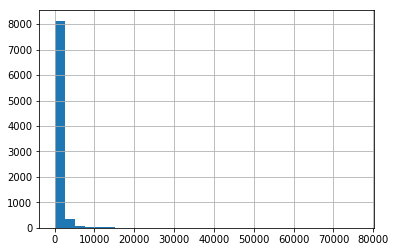

In [7]:
data.MINIMUM_PAYMENTS.hist(bins=30)
print(data.MINIMUM_PAYMENTS.describe())

**Apart from 313 nulls in *Minimum Payments* and 1 null in *Credit Limit*, there is no null in the dataset, which is a good news. Given *Minimum Payments* is extremely right-skewed, Here I treat the null values by substituting them with median values, 312.**

In [8]:
#remove the observation with credit limit missing value
credit=data[data.CREDIT_LIMIT.notnull()]
#replace the minumum payment missing value as median value
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

#### 3. data cleaning

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

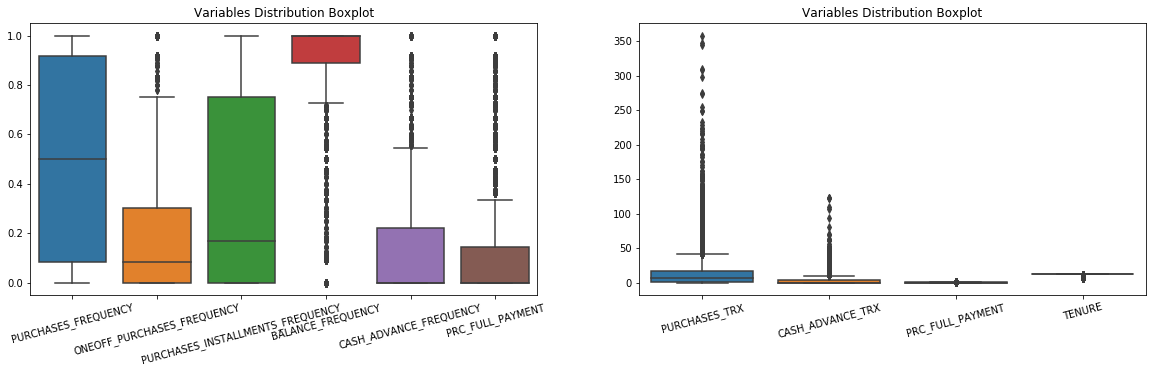

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(data=credit[['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
                         'PURCHASES_INSTALLMENTS_FREQUENCY','BALANCE_FREQUENCY',
                         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']])
plt.title('Variables Distribution Boxplot')
plt.xticks(rotation=15)
plt.subplot(1,2,2)
sns.boxplot(data=credit[['PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PRC_FULL_PAYMENT', 'TENURE']])
plt.title('Variables Distribution Boxplot')
plt.xticks(rotation=15)

Text(0.5, 1.0, 'Variables Distribution Boxplot')

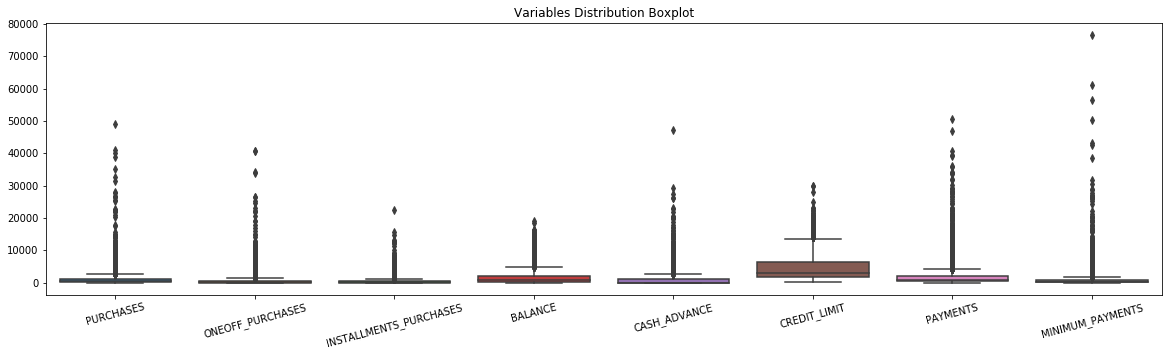

In [36]:
plt.figure(figsize=(20,5))
sns.boxplot(data=credit[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','BALANCE',
                         'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']])
plt.xticks(rotation=15)
plt.title('Variables Distribution Boxplot')

**It shows each variables contains too many outliers. Especially, according to the definition, *CASH_ADVANCE_FREQUENCY* should range from 0 to 1, so I delete those observations whose *CASH_ADVANCE_FREQUENCY* is bigger than 1.**

In [11]:
credit=credit[credit.CASH_ADVANCE_FREQUENCY<=1]

In [12]:
#try to drop outliers according to z-score
from scipy import stats
z = np.abs(stats.zscore(credit[credit.columns[2:credit.columns.size]]))
#define threshold = 3
data_o = credit[credit.columns[2:credit.columns.size]][(z < 3).all(axis=1)]
print('By deleting extreme values beyond 3 std, only ',round(data_o.shape[0]/credit.shape[0],2)*100,'% data left. Thus I keep all outliers.')

By deleting extreme values beyond 3 std, only  83.0 % data left. Thus I keep all outliers.


### Qestion 1.
**Identify those users that purchase went above the monthly credit card limit and visualize the composition of their purchase.**

In [13]:
#To answer the question, I need to combine the informaton of credit line and purchase by merging 2 datasets. 
#This was done in previous data cleaning part.
q1=credit[credit.PURCHASES>=credit.CREDIT_LIMIT]

In [14]:
q1_new=q1[['CUST_ID','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE']]
#calculate the installment percentage of all purchase
q1_new['PCT_INSTALLMENTS_PURCHASES']=q1_new['INSTALLMENTS_PURCHASES']/q1_new['PURCHASES']

Text(0.5, 1.0, 'Percentage of Installment Purchases Histogram')

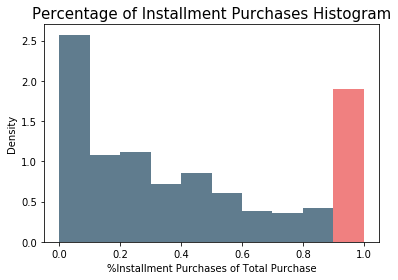

In [15]:
n, bins, patches = plt.hist(x=q1_new.PCT_INSTALLMENTS_PURCHASES, 
                            bins='auto', 
                            color='#607c8e',
                            density=True)
patches[9].set_fc('lightcoral')
plt.xlabel('%Installment Purchases of Total Purchase')
plt.ylabel('Density')
plt.title('Percentage of Installment Purchases Histogram',fontsize=15)

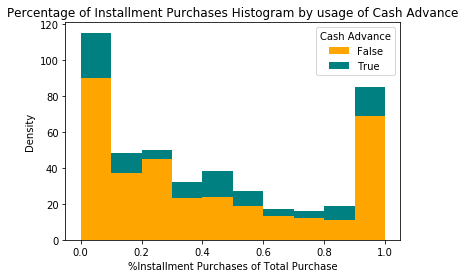

In [16]:
#define cash as the presence of cash advance
q1_new['cash']=q1_new['CASH_ADVANCE']>0
q1_new.pivot(columns='cash').PCT_INSTALLMENTS_PURCHASES.plot(kind = 'hist', stacked=True,
                                                             color=['orange','teal'],
                                                             bins=10)
plt.gca().set(title='Percentage of Installment Purchases Histogram by usage of Cash Advance',
              ylabel='Density',xlabel='%Installment Purchases of Total Purchase')
plt.legend(title='Cash Advance')
plt.show()

**In the dataset, customer could have 2 kinds of *purchase*, one is for *installment*, another is for *other purchase*.**

- **The first hisogram shows for users whose purchase went above the monthly credit line, around 20% of them spent the more than 90% money in installment purchase, which would be occur regularly and need further investigation by credit company. If it turns out they have strong ability and credibility to pay the loan, company may think about increase their credit line to meet their other purchase need.**


- **It shows for users whose purchase went above the monthly credit line, around 25% of them are big spenders and spent more than 90% money in other purchase. From the second hisogram we could tell part of those users tend to use cash advance, which is withdraw cash from credit card and take high interest rate. Company need exam throughly the credibility of those users since they went above the credit line and use cash advance**


### Qestion 2.
**Using appropriate unsupervised methodology to do customer segmentation and visualizing it in 2D or 3D plot**

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
#Lets drop the Customer ID Column as it does not tell any information about the customer or credit cardcredit.
analysis=credit
analysis.drop('CUST_ID',axis=1, inplace = True)

#### 1. Normalizing input values

In [37]:
import warnings
warnings.simplefilter('ignore')
scale = StandardScaler()
X_scale = scale.fit_transform(analysis)

#### 2. Clustering using Kmeans

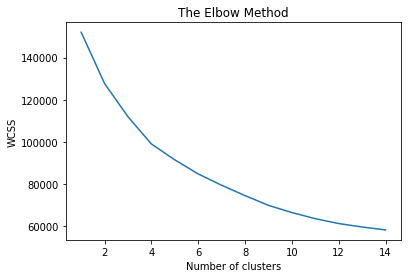

In [20]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 101)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#Fitting KMeans to dataset and pick UP 4 category
kmean= KMeans(4,init = 'k-means++', random_state = 101)
kmean.fit(X_scale)
labels=kmean.labels_

#### 3. Visualization of Clusters
using PCA to do the dimension reduction

Text(0.5, 1.0, 'Cumulative Explained Variance By Components')

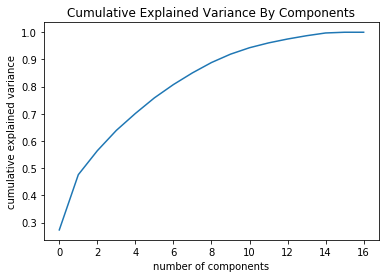

In [22]:
pca = PCA().fit(X_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance By Components')

In [23]:
pca = PCA(2)
pca.fit(X_scale)
X_PCA = pca.transform(X_scale)
pca.explained_variance_ratio_

array([0.27293825, 0.20316369])

**Explained Variance**

- **This curve quantifies how much of the total, 17-dimensional variance is contained within the first N components. For example, we see that with the digits the first 4 components contain approximately 70% of the variance, while you need around 12 components to describe close to 100% of the variance.**


- **The explained variance tells us how much information (variance) can be attributed to each of the principal components. First principal component contains 27% of the variance and the second principal component contains 20% of the variance. Together, the two components contain 50% of the information.**

In [24]:
cdict={1: 'blue',
          2: 'orange',
          3: 'green', 
          4: 'red' }
labl={1: 'Cluster 1',
          2: 'Cluster 2',
          3: 'Cluster 3', 
          4: 'Cluster 4'}

x, y = X_PCA[:, 0], X_PCA[:, 1]
df = pd.DataFrame({'x': x, 'y':y, 'label':labels+1}) 

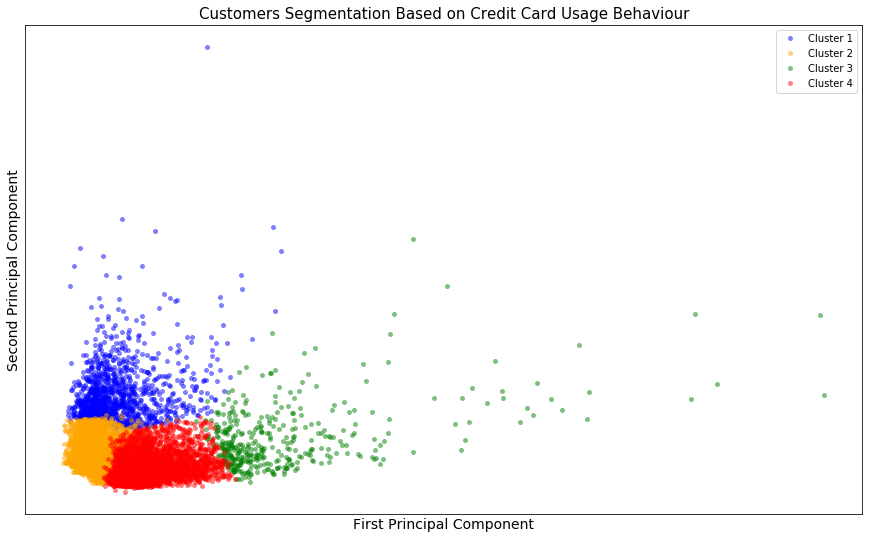

In [38]:
import warnings
warnings.simplefilter('ignore')
fig,ax=plt.subplots(figsize=(15,9))
fig.patch.set_facecolor('white')
groups = df.groupby('label')
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=cdict[name],label=labl[name], mec='none',alpha=0.5)
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis='y',which='both',left='off',top='off',labelleft='off')
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.title("Customers Segmentation Based on Credit Card Usage Behaviour",fontsize=15)
plt.show()

**The four clusters are beautifully differenciate each other in 2D visualization. Cluster 2,3,4 have similar ranges in second principal components direction while spreading out in first principal component. And cluster 1 high higher value of second principal components. To better understand the meaning of these two component, we move forward to Question 3.**

### Question 3
**Profile customer's usage patterns in different cluster and define marketing strategy.**

#### 1. Assign observation into different cluster according to result of Kmeans method

In [26]:
clusters=pd.concat([pd.DataFrame(X_scale), pd.DataFrame({'cluster':labels+1})], axis=1)
clusters.columns=['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX', 'BALANCE',
       'BALANCE_FREQUENCY', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE','cluster']
clusters.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.425134,-0.357050,-0.349397,-0.807365,-0.678659,-0.708180,-0.511676,-0.731363,-0.249412,-0.465958,-0.678923,-0.475128,-0.959889,-0.528992,-0.302240,-0.525889,0.359427,2
1,-0.469767,-0.357050,-0.454852,-1.222618,-0.678659,-0.917845,-0.592110,0.788911,0.134388,2.608374,0.585890,0.112319,0.689259,0.818192,0.097472,0.233613,0.359427,1
2,-0.108034,0.108558,-0.454852,1.268895,2.672242,-0.917845,-0.109509,0.448789,0.518189,-0.465958,-0.678923,-0.475128,0.826688,-0.383865,-0.093232,-0.525889,0.359427,4
3,0.231550,0.545658,-0.454852,-1.014993,-0.399419,-0.917845,-0.551893,0.050406,-1.017012,-0.367764,-0.257320,-0.328267,0.826688,-0.598678,-0.228135,-0.525889,0.359427,2
4,-0.462281,-0.347414,-0.454852,-1.014993,-0.399419,-0.917845,-0.551893,-0.357824,0.518189,-0.465958,-0.678923,-0.475128,-0.904917,-0.364434,-0.257127,-0.525889,0.359427,2


#### 2. Relationship between principal components and original features
Two axes as they are some complex mixture of the original features. We can make a heat-plot to see how the features mixed up to create the components.

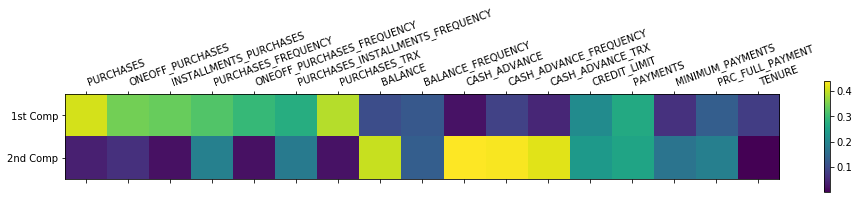

In [39]:
import warnings
warnings.simplefilter('ignore')

plt.matshow(abs(pca.components_),cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(analysis.columns)),analysis.columns,rotation=20,ha='left')
plt.tight_layout()
plt.show()

- We could tell first 7 features contribute most towards the 1st PC, which all related to purchase
- Features 8 to Features 12 contribute most towards the 2st PC, which contains balance and cash advance information

#### 4. Pearson correlation between original features

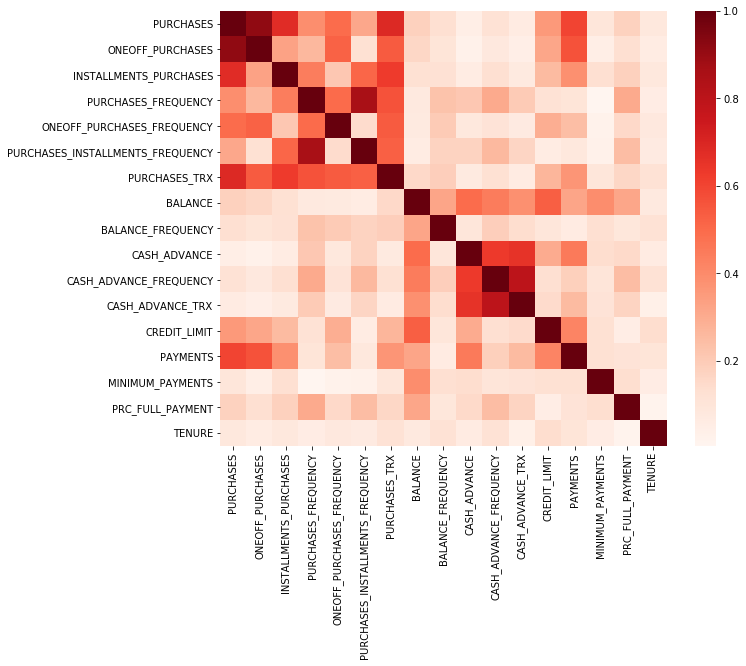

In [28]:
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = abs(analysis.corr())
s=sns.heatmap(cor, cmap=plt.cm.Reds)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

**We could tell some varibales have strong association with each other, which indicates information overlap. So, to better interpret cluster with representable features and enough information, I pick up these variables:  
'PURCHASES', 
'PURCHASES_FREQUENCY',
'BALANCE',
'BALANCE_FREQUENCY', 
'CASH_ADVANCE',
"CREDIT_LIMIT", 
"PAYMENTS"**

#### 5. Interpretation of Clusters

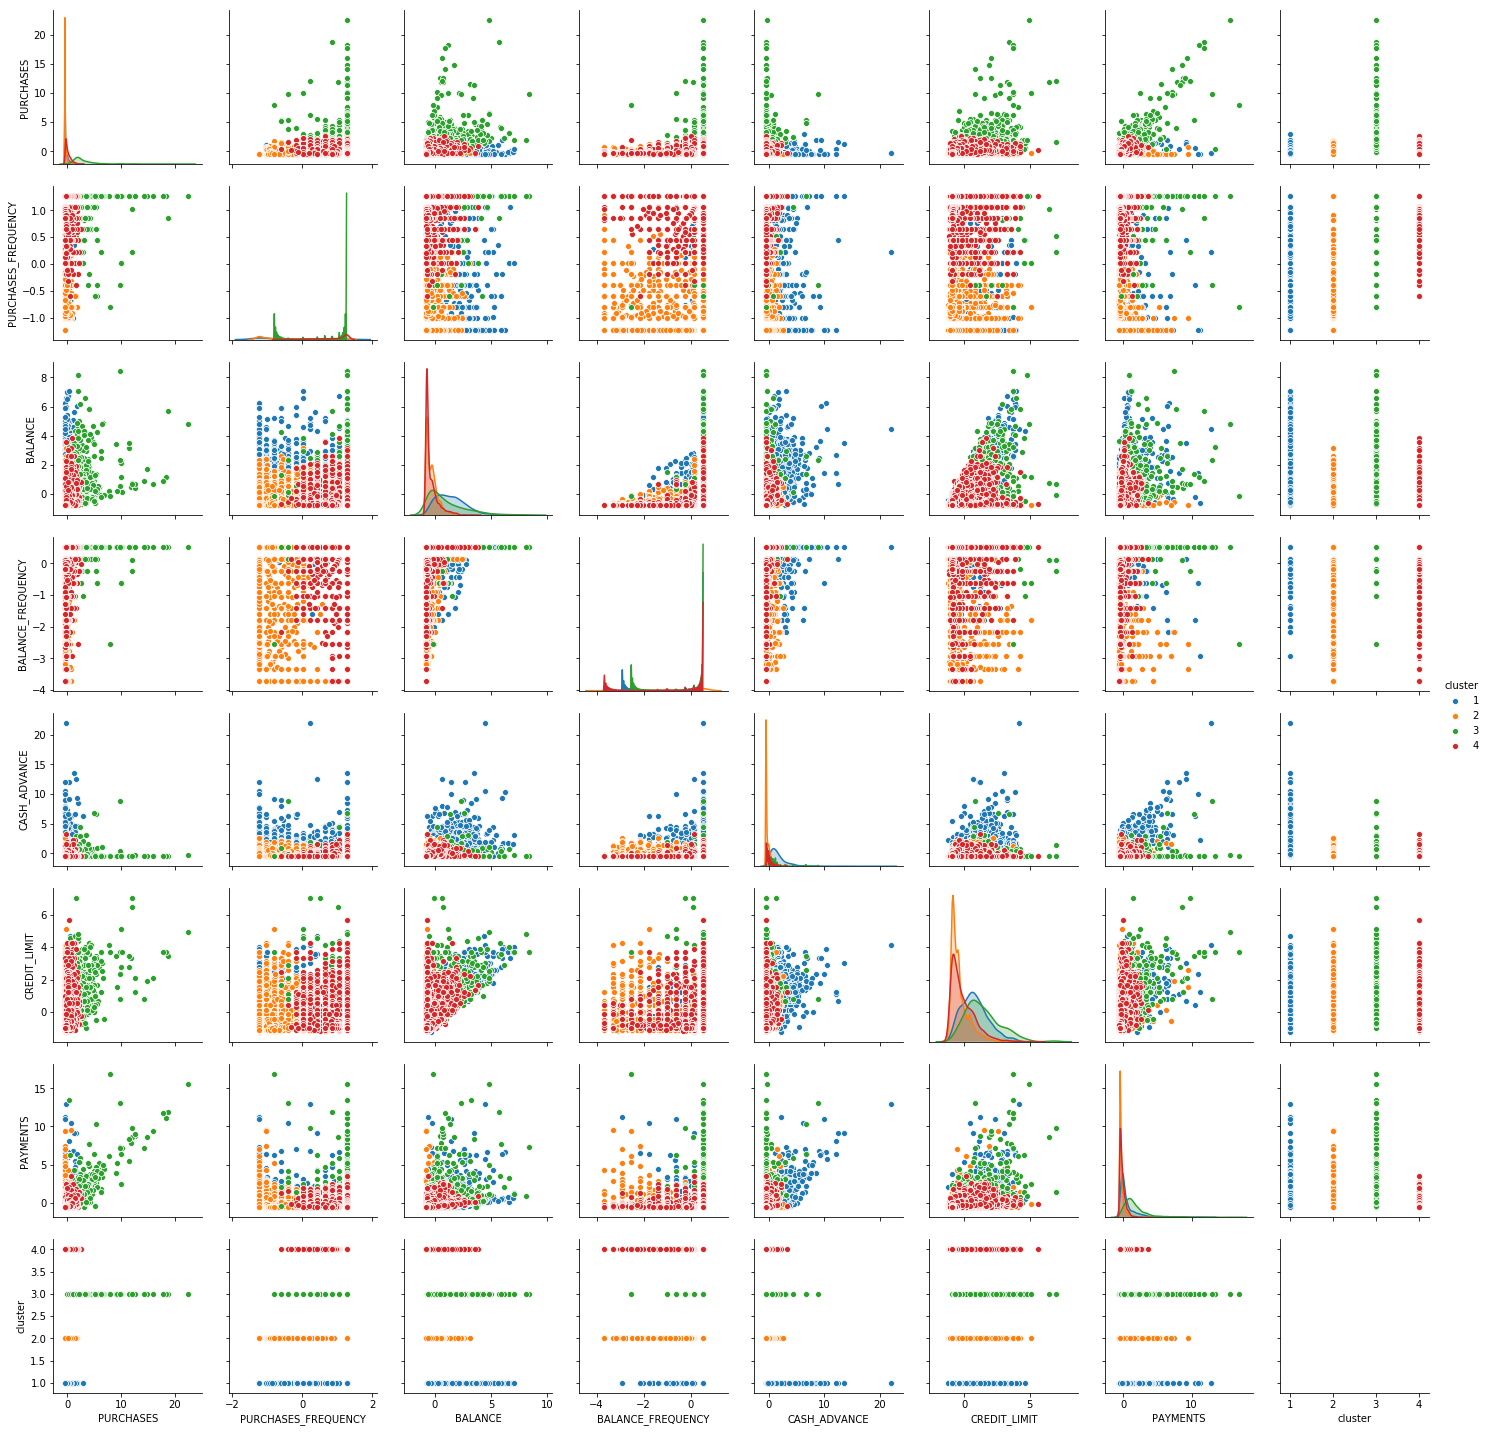

In [29]:
best_cols = ['PURCHASES', 'PURCHASES_FREQUENCY', 'BALANCE', 'BALANCE_FREQUENCY', 
             'CASH_ADVANCE', "CREDIT_LIMIT", "PAYMENTS","cluster"]
sns.pairplot(clusters[ best_cols ], hue="cluster")

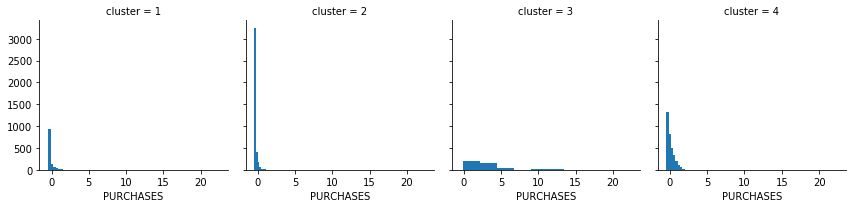

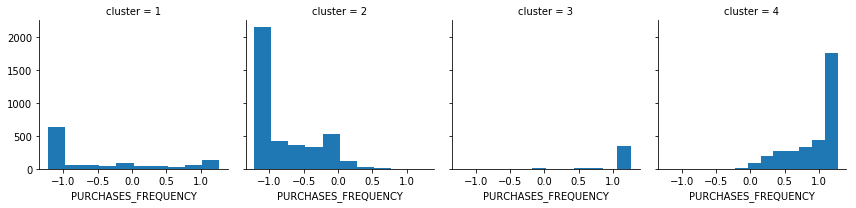

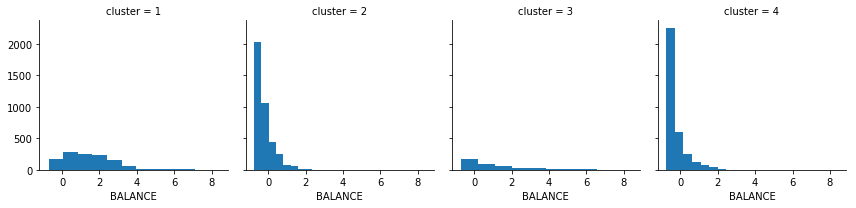

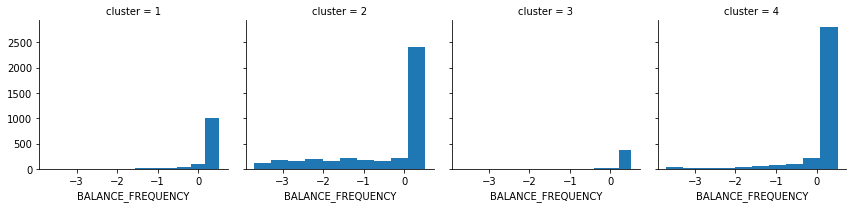

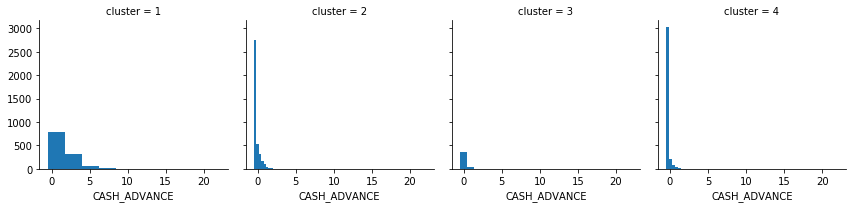

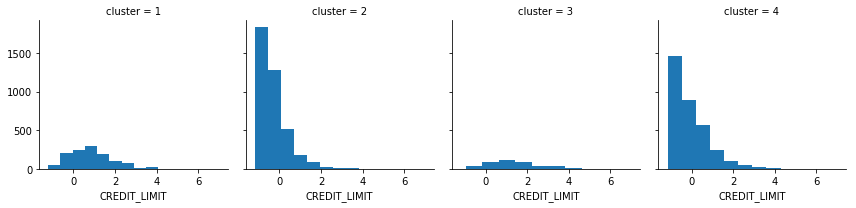

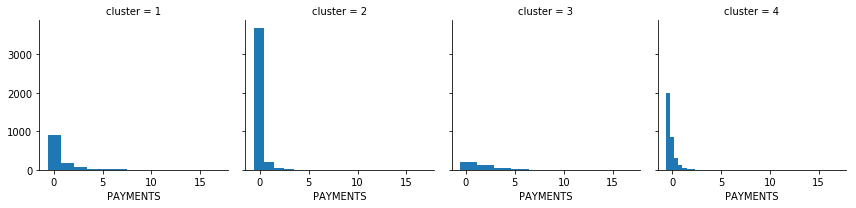

In [30]:
for c in clusters[['PURCHASES', 'PURCHASES_FREQUENCY', 'BALANCE', 'BALANCE_FREQUENCY', 
                   'CASH_ADVANCE', "CREDIT_LIMIT", "PAYMENTS" ]]:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

**Cluster Count**

In [31]:
clusters.groupby('cluster')['PAYMENTS'].count()

cluster
1    1205
2    3963
3     409
4    3364
Name: PAYMENTS, dtype: int64

In [32]:
clusters.groupby('cluster')['PAYMENTS'].count()/len(clusters)

cluster
1    0.134772
2    0.443239
3    0.045744
4    0.376244
Name: PAYMENTS, dtype: float64

**Cluster Characterization and Market Strategy**

**Cluster 1. Cash Advances with Medium Balance and Medium Purchase**

These customers have relative medium balances, medium credit line, and they also didn't make big or small purchases but they did everything in a medium level. However, they are a big fan of cash advance, which means they withdraw cash from credit card and take high interest rate. They are represented by **blue** in the chart and accounts 13% in total population. Company may investigate more about their need of cash advance and assess their risk level given they have the second highest credit line.

**Cluster 2. Frugal and Inactive Customers (Low balance, Low purchase)**

These are the customers that made the smallest purchases with low credit limit, and the customers did not make purchases frequently. Also they basicaly never take cash in advance and avoid the high interest.  Unfortunately they are the largest group accounting for 44% and are represented by **orange** in the chart. Therefore, it can be assumed that these customers churned out, and marketing strategies can be devised to target these customers with better offer to simulate their desiration of purchase. It's possible that the credit card provided by company is not the main credit card they use daily and they might be attracted to company with better offer and higher credit limit line.

**Cluster 3. Big Spender with High Balance** 

These people are big spender with loyalty. They made expensive purchases but they also had high credit limit and high balances to support these purchases. They also made large payments, and can be the target for market research and create more value for company. Unfortunately they are the smallest group of customers currently and are represented by **green**.

**Cluster 4. Active User with High Cash Flow** 

This group accounts for 38% in total population, people within this group have low credit limit and low balance, but their account are quite active: they made purchase very frequently, they update their balance frequently, and take advance cash more often. This segment of people are represented by **red**. Company could increase their credit limit line to simulate more purchases.


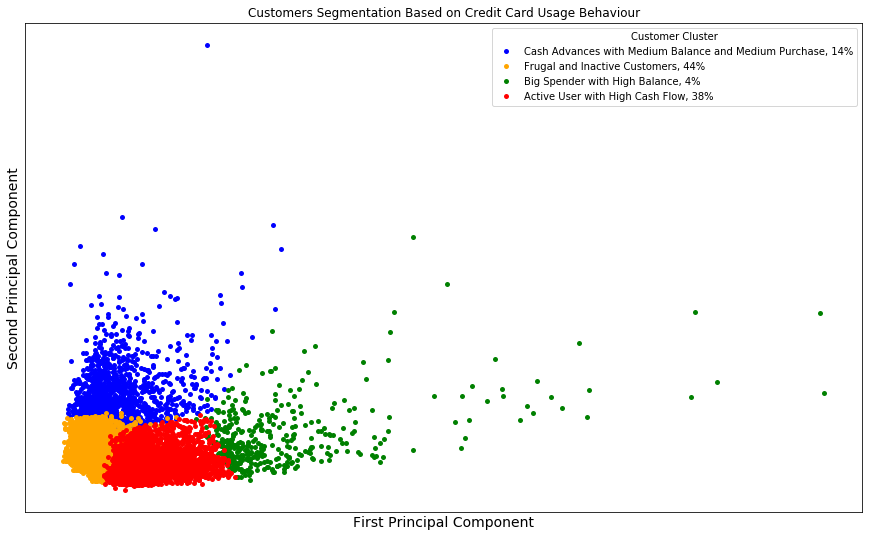

In [33]:
#plot again to show different categories
import warnings
warnings.simplefilter('ignore')

names = {1: 'Cash Advances with Medium Balance and Medium Purchase, 14%', 
         2: 'Frugal and Inactive Customers, 44%', 
         3: 'Big Spender with High Balance, 4%', 
         4: 'Active User with High Cash Flow, 38%'}
  
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15,9)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=cdict[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(title='Customer Cluster')
ax.set_title("Customers Segmentation Based on Credit Card Usage Behaviour")
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.show()